___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `ESTEBAN GÓMEZ, AISSA GONZALEZ Y SARAH BELTRAN` </Strong>
- <Strong> Año </Strong>: 2024
___




### INTRODUCCIÓN:

<p style="text-align: justify;">
El California Housing Prices Dataset contiene información sobre viviendas en California, como la ubicación, número de habitaciones, población, ingresos de los hogares y la proximidad al océano. El objetivo principal es predecir el valor medio de una vivienda en diferentes áreas geográficas.
</p>

### OBJETIVO: 
<p style="text-align: justify;">
El objetivo del proyecto es predecir el valor medio de las viviendas en diferentes áreas de California utilizando características socioeconómicas y geográficas como los ingresos de los hogares, número de habitaciones, población y proximidad al océano. Esta predicción permitirá identificar patrones que expliquen la variabilidad de los precios inmobiliarios, facilitando la toma de decisiones en múltiples sectores. 

Esto nos puede servir en la vida cotidiana si se busca el precio de una vivienda específica en California, esto con el fin de buscar un aproximado de cuanto debería valer alguna propiedad y de cuanto se dispone para comprar o rentar alguna vivienda con características específicas.
</p>

### FEATURES

1. Longitude: medida de qué tan al oeste está una casa; un valor más alto está más al oeste.

2. Latitude: medida de qué tan al norte está una casa; un valor más alto está más al norte.

3. Housing MedianAge: Edad media de una casa dentro de una manzana; un número más bajo es un edificio más nuevo.

4. Total Rooms: número total de habitaciones dentro de un bloque.

5. Total Bedrooms: Número total de dormitorios dentro de un bloque.

6. Population: Número total de personas que residen dentro de una cuadra.

7. Households: número total de hogares, un grupo de personas que residen dentro de una unidad residencial, para un bloque.

8. Median income: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares estadounidenses).

9. Median House Value: valor medio de la vivienda para hogares dentro de un bloque (medido en dólares estadounidenses). (Nuestra variable a predecir)

10. Ocean Proximity: Ubicación de la casa frente al océano o mar.


### <font color= ##28af2e>Librerías</font>

In [1818]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### <font color= ##28af2e>Exploración de datos</font>

In [1819]:
df = pd.read_csv("housing.csv")

In [1820]:
#Dimension de los datos
df.shape

(20640, 10)

In [1821]:
# Primeros 5 renglones de la base de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [1822]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

De nuestra única variable categórica sacamos la cantidad de veces en que cada respuesta se repite y a continuación creamos una gráfica con el fin de conocer la frecuencia de cada opción.

<Axes: >

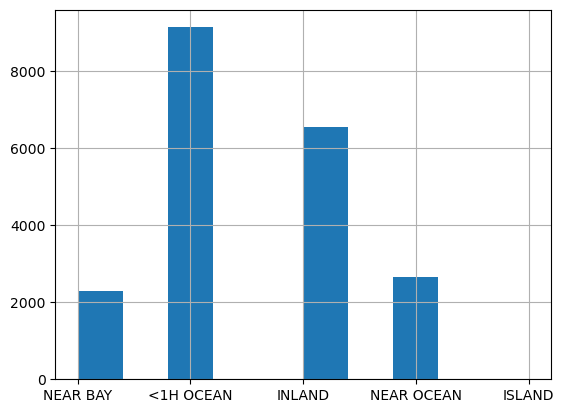

In [1823]:
df['ocean_proximity'].hist()

La variable categórica la convertimos en unas nuevas columnas cada una con un "1" cuando es verdad y un "0" cuando no lo es, por ejemplo si en un registro aparece un "1" en INLAND, quiere decir que ese registro se encuentra en tierra.

In [1868]:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.rename(columns={'ocean_proximity_<1H OCEAN': '<1H OCEAN'}, inplace = True)
df.rename(columns={'ocean_proximity_INLAND': 'INLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_ISLAND': 'ISLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR BAY': 'NEAR BAY'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR OCEAN': 'NEAR OCEAN'}, inplace = True)

df[['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', 'INLAND']] = df[['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND', 'INLAND']].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


A continuación se observa una descripción breve del dataset

In [1825]:
# Descripción de los datos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1826]:
#Visualizar todo junto
def reporte(datos):
    dtypes = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    uniques = pd.DataFrame(datos.nunique(), columns=['Valores_Unicos'])
    max = pd.DataFrame(datos.max(), columns=['Max'])
    min = pd.DataFrame(datos.min(), columns=['Min'])
    return dtypes.join(missing).join(uniques).join(max).join(min)

reporte(df)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
longitude,float64,0,844,-114.3100,-124.3500
latitude,float64,0,862,41.9500,32.5400
housing_median_age,float64,0,52,52.0000,1.0000
total_rooms,float64,0,5926,39320.0000,2.0000
total_bedrooms,float64,207,1923,6445.0000,1.0000
population,float64,0,3888,35682.0000,3.0000
households,float64,0,1815,6082.0000,1.0000
median_income,float64,0,12928,15.0001,0.4999
median_house_value,float64,0,3842,500001.0000,14999.0000
<1H OCEAN,int64,0,2,1.0000,0.0000


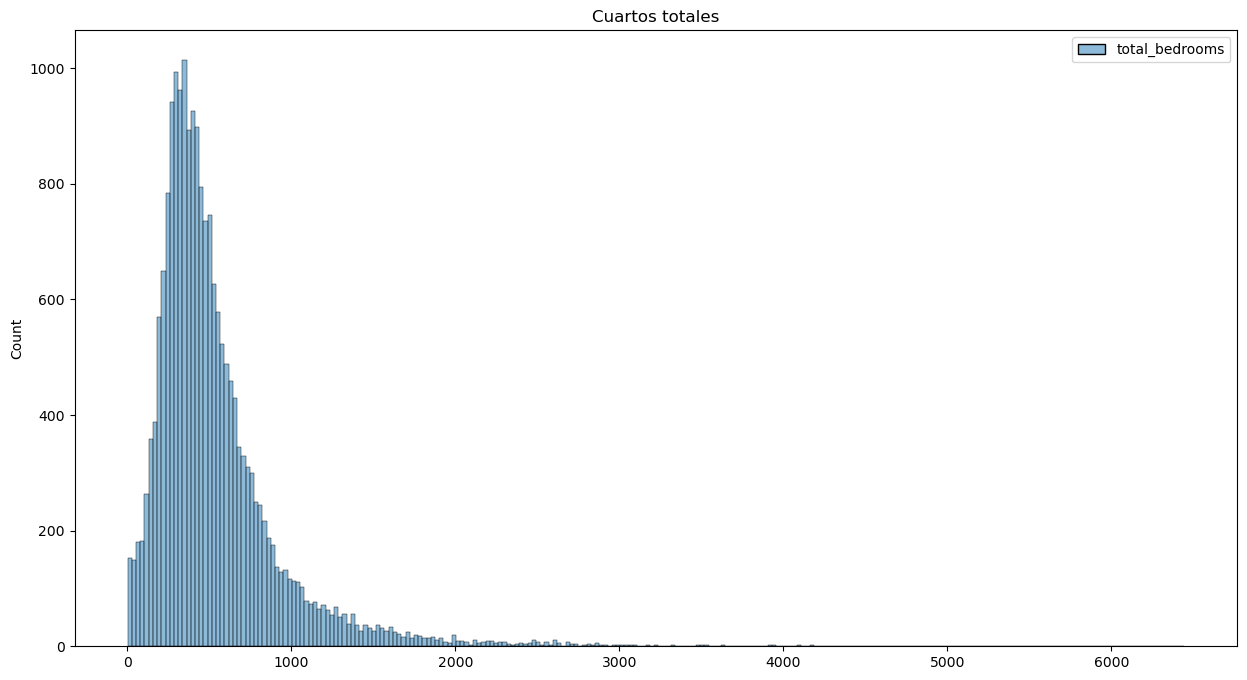

In [1827]:
# Eliminación de los nulos
plt.figure(figsize = (15, 8))  
sns.histplot(data = df[['total_bedrooms']])
plt.title('Cuartos totales')
plt.show()

Eliminamos los nulos ya que son muy pocos los nulos comparados al total de los registros

In [1828]:
df = df.dropna(subset = ['total_bedrooms'])

In [1829]:
df['total_bedrooms'].isna().sum()

0

### <font color= ##28af2e>Valores atípicos</font>

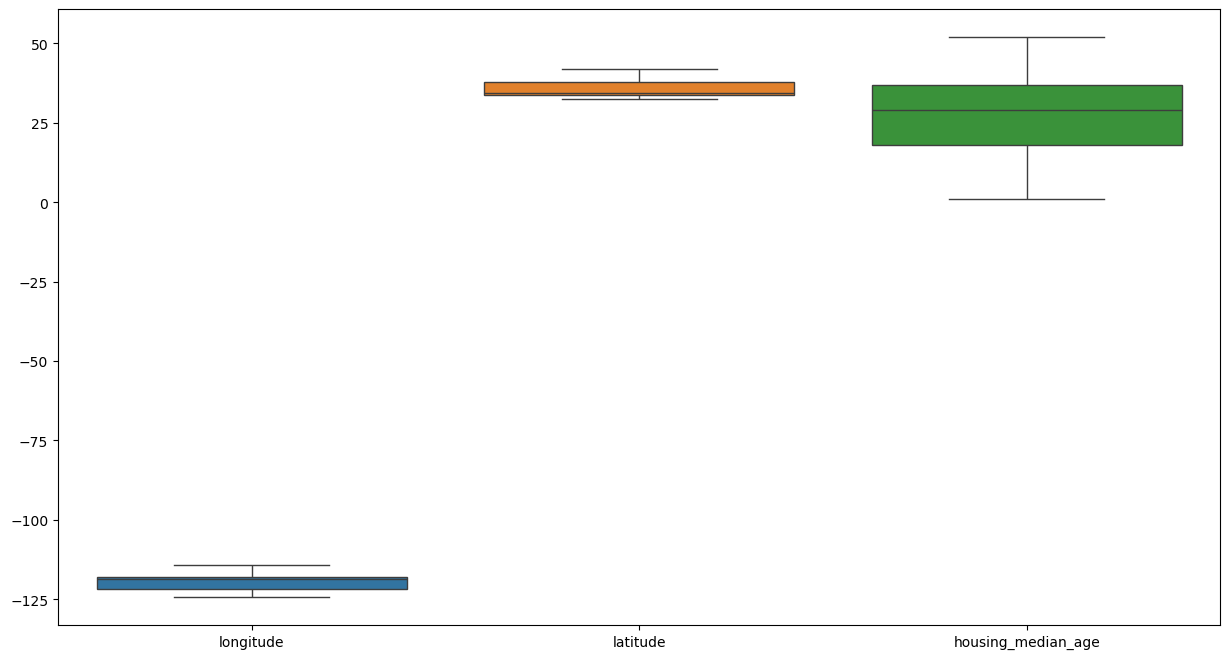

In [1830]:
# Boxplot de nuestros features
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['longitude', 'latitude', 'housing_median_age']])
plt.show()

Podemos observar que a partir de la longitud, la latitud y la edad media de la casa, los demás features tienen un gran número de valores atípicos, lo cual hace sentido ya que los costos en California son extremadamente variados.

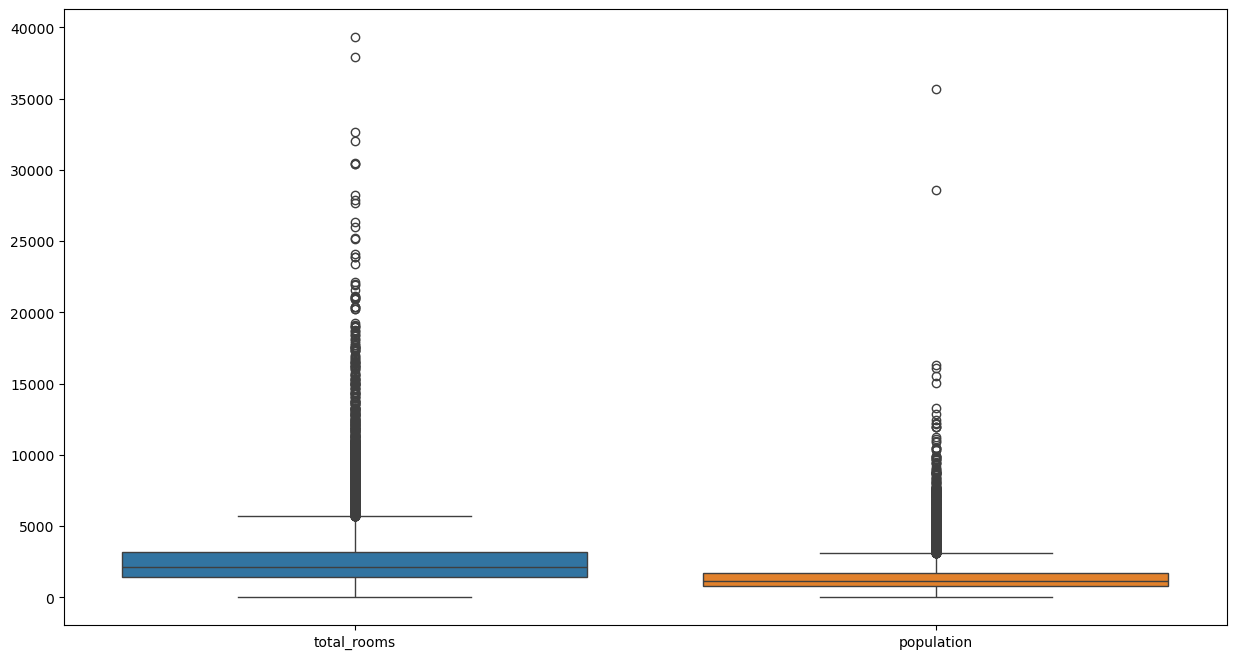

In [1831]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['total_rooms', 'population']])
plt.show()

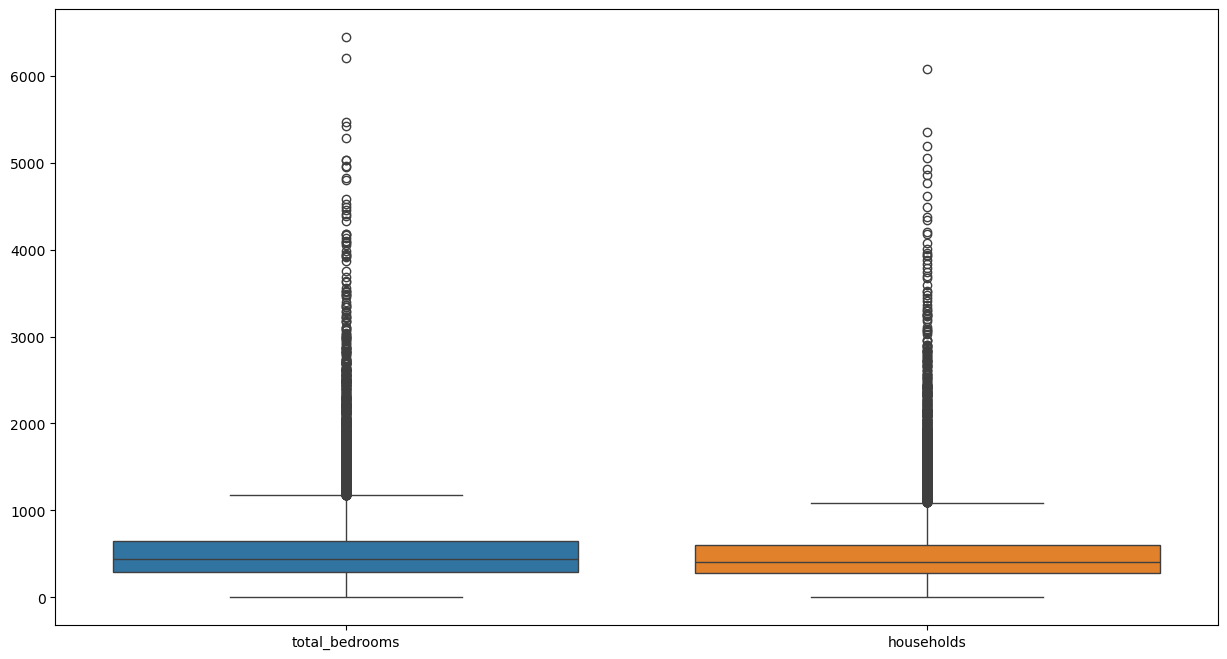

In [1832]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['total_bedrooms', 'households']])
plt.show()

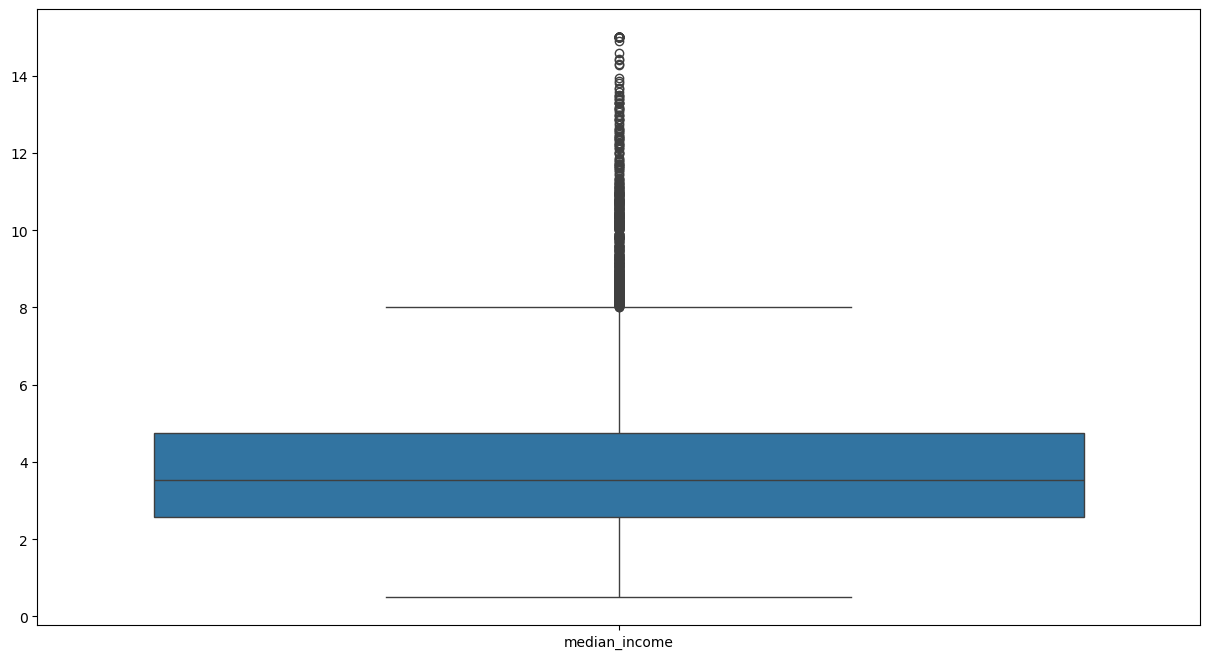

In [1833]:
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['median_income']])
plt.show()

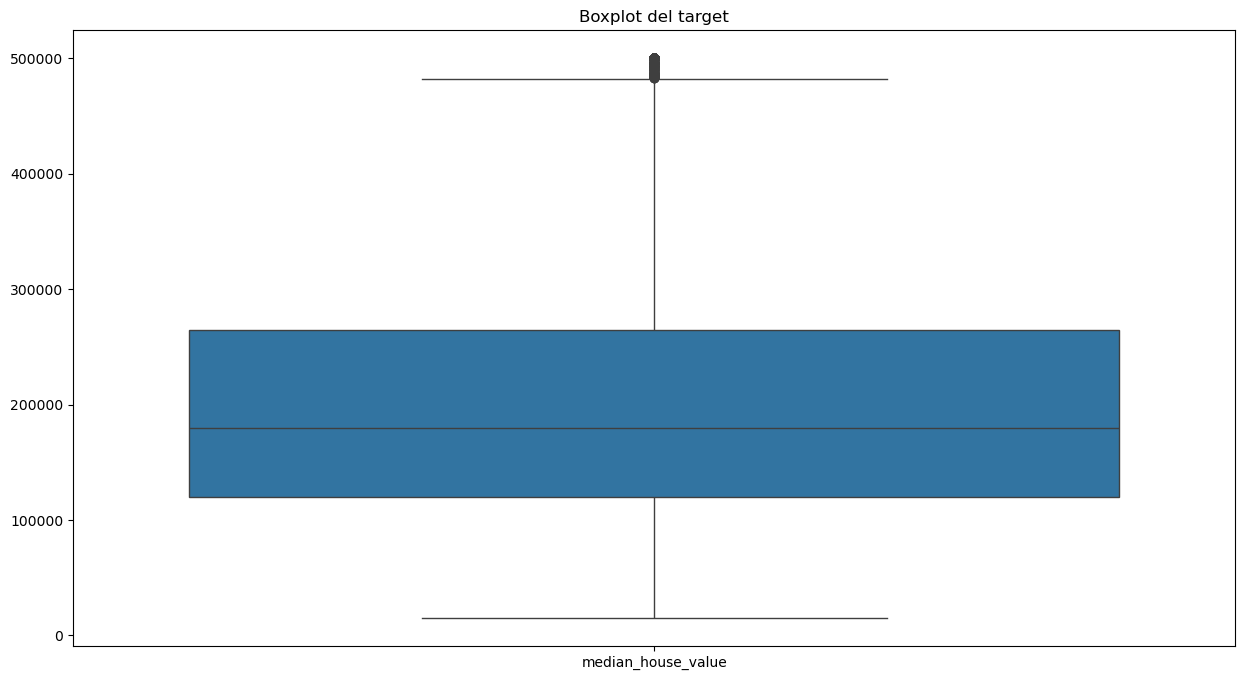

In [1834]:
# Boxplot del target
plt.figure(figsize = (15, 8))  
sns.boxplot(data = df[['median_house_value']])
plt.title('Boxplot del target')
plt.show()

### <font color= ##28af2e>Distribución de datos</font>

In [1835]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [1836]:
numericas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 'households', 'median_income']

categ = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [1837]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

Podemos observar que la mayoría de features tienen una distribución casi normal, si no fuera por valores atípicos que nos jalan la cola casi siempre a la derecha, tienen sesgo positivo.

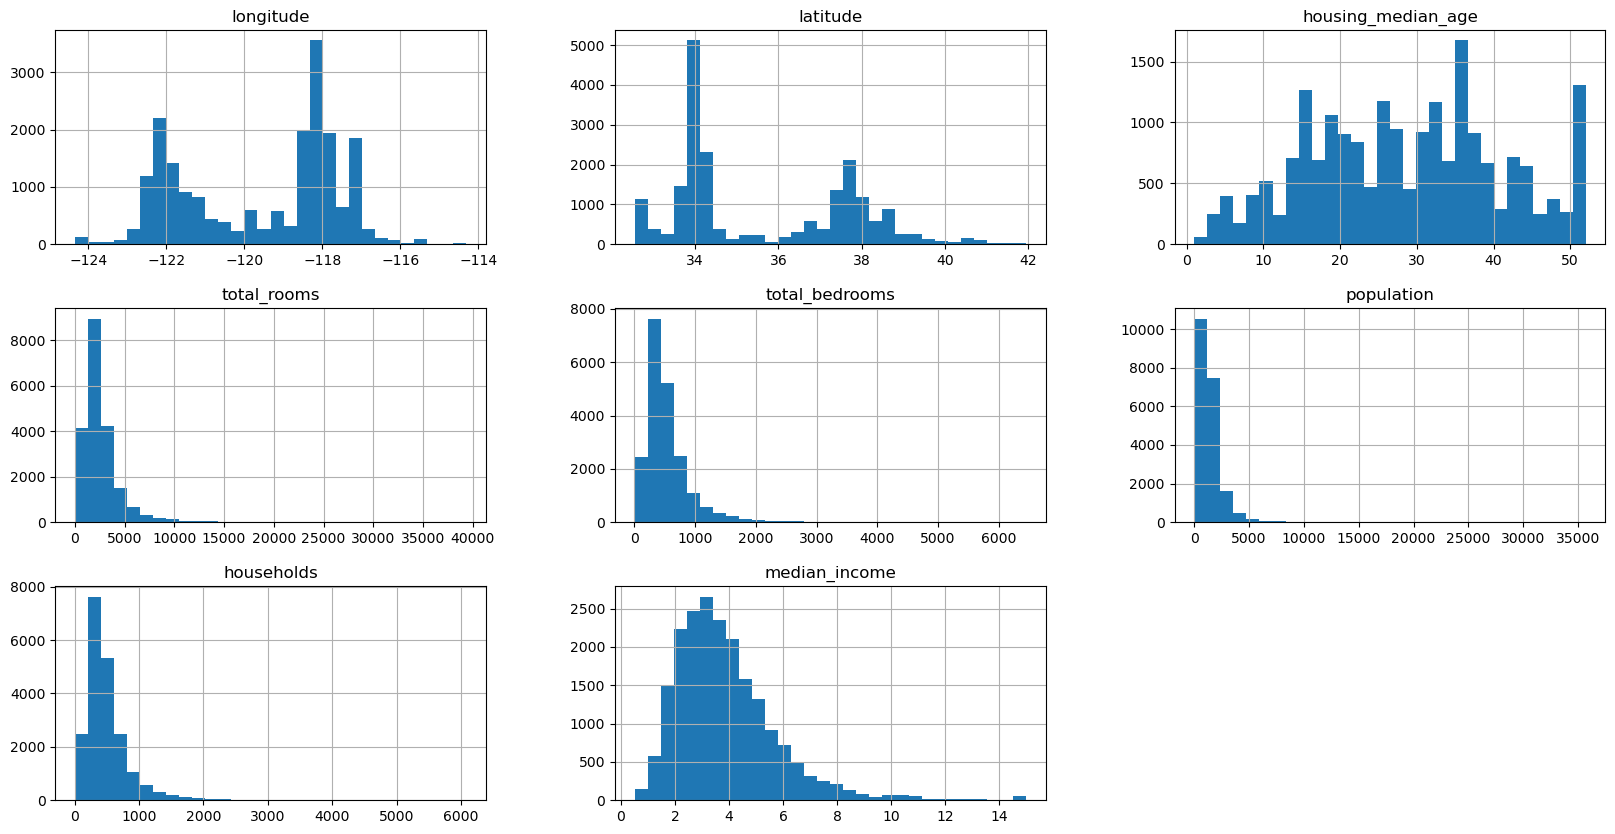

In [1838]:
df[numericas].hist(bins = 30,figsize = (20,10))
plt.show()

En la siguiente representación podemos ver cuantas zonas se encuentran en cada región

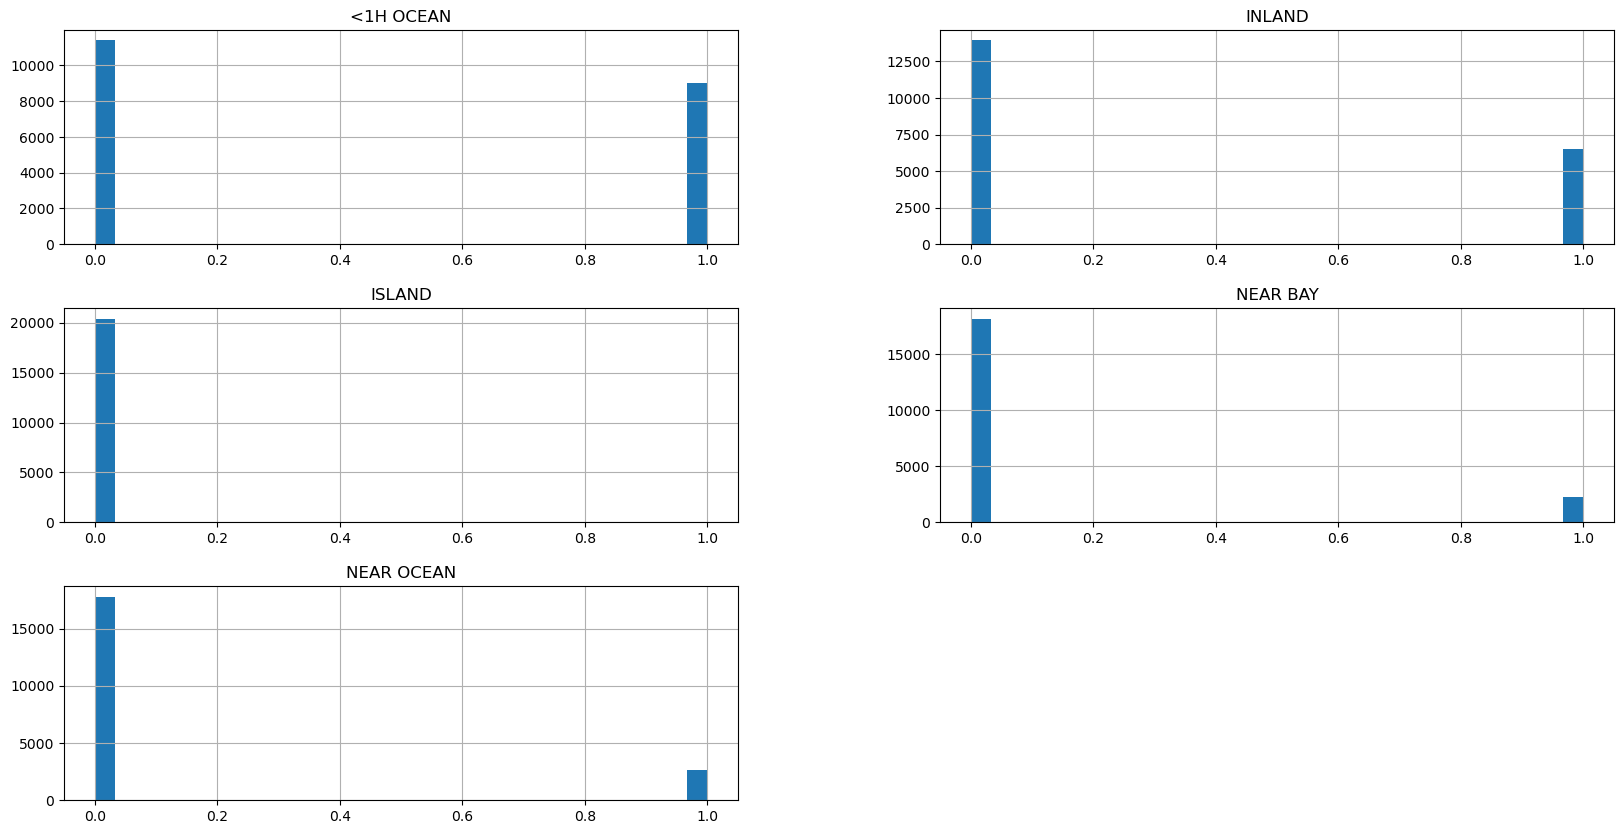

In [1839]:
df[categ].hist(bins = 30,figsize = (20,10))
plt.show()

Finalmente vemos a continuación la distribución de nuestro target.

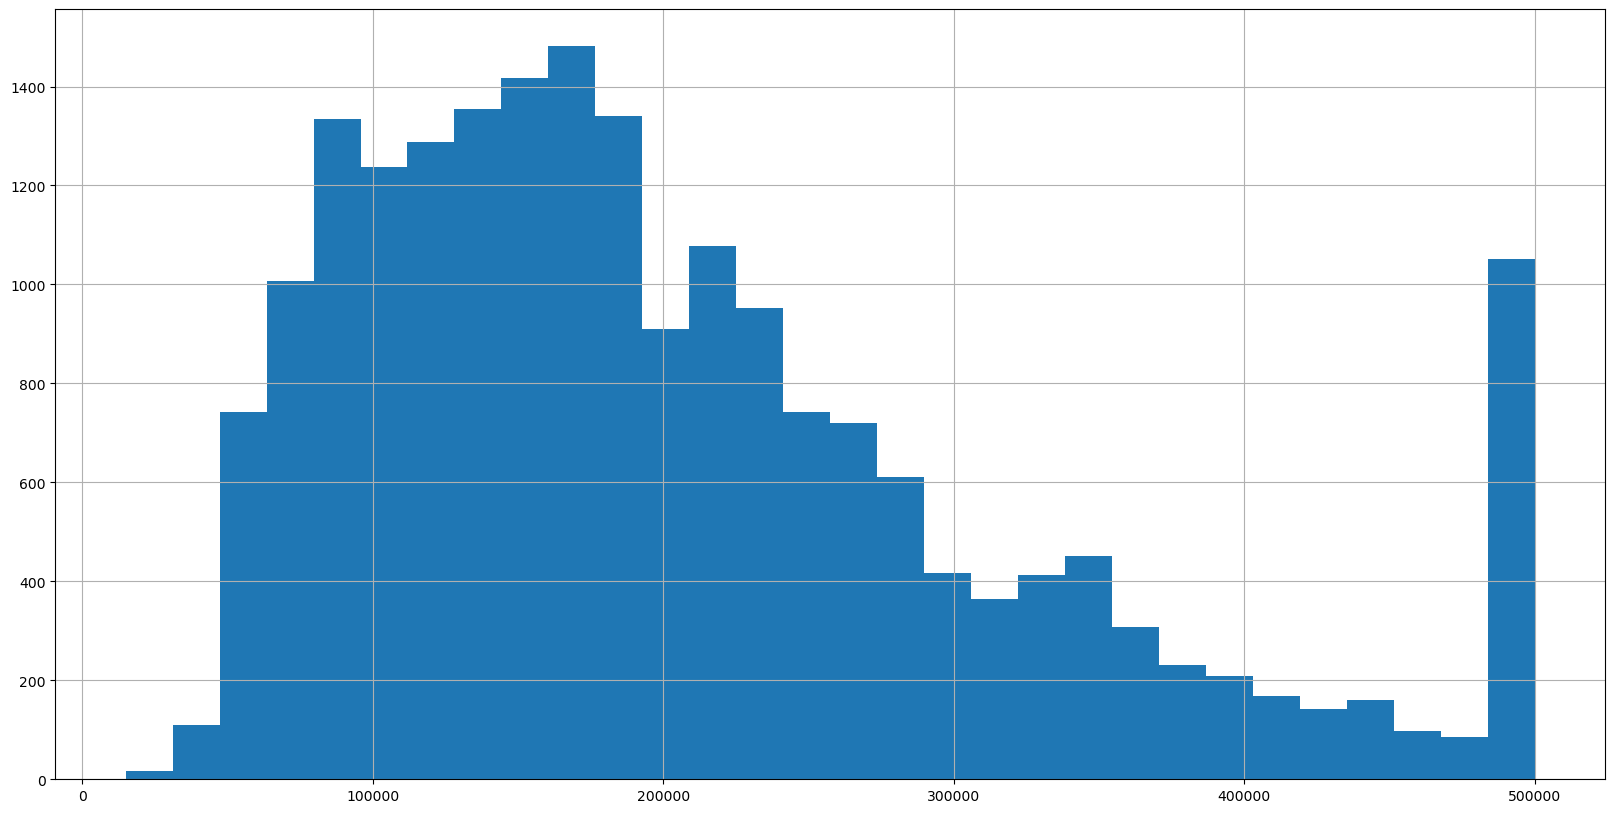

In [1840]:
y.hist(bins = 30,figsize = (20,10))
plt.show()

### <font color= ##28af2e> Train / Test </font>

In [1841]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Tamaño del X-train:", X_train.shape)
print("Tamaño del X-test:", X_test.shape)
print("Tamaño del y-train:", y_train.shape)
print("Tamaño del y-test:", y_test.shape)

Tamaño del X-train: (16346, 13)
Tamaño del X-test: (4087, 13)
Tamaño del y-train: (16346,)
Tamaño del y-test: (4087,)


In [1842]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numericas]), columns=numericas, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numericas]), columns=numericas, index=X_test.index)

X_train = pd.concat([X_train_scaled, X_train[categ]], axis=1)
X_test = pd.concat([X_test_scaled, X_test[categ]], axis=1)

In [1843]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-1.106514,0.786208,-1.162062,0.829311,0.929297,1.131110,1.040744,0.438412,1,0,0,0,0
2057,-0.024671,0.467873,0.348657,-0.738558,-0.850523,-0.708899,-0.856152,-0.242389,0,1,0,0,0
6453,0.758045,-0.711838,-0.287435,0.587350,0.747242,0.378459,0.691525,-0.108969,0,1,0,0,0
4619,0.633408,-0.735245,-0.048901,-0.122742,0.989183,1.185124,1.048681,-0.861168,1,0,0,0,0
15266,1.151895,-1.217429,-0.128412,-0.365632,-0.345083,-0.105008,-0.247664,-0.168986,0,0,0,0,1


In [1844]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14416,1.166852,-1.334464,-0.684993,-0.773389,-0.618165,-0.793019,-0.644504,-0.361950,0,0,0,0,1
16383,-0.852256,1.109224,-2.116201,1.753964,1.389223,1.688071,1.215354,0.324805,0,1,0,0,0
7731,0.718161,-0.805466,0.189634,0.513044,0.759220,0.790203,0.802640,-0.340925,1,0,0,0,0
1410,-1.241122,1.076455,0.110122,-0.634529,-0.622956,-0.631863,-0.731809,-0.515710,0,0,0,1,0
1335,-1.151383,1.099862,-1.957178,-0.211446,0.145984,-0.436174,-0.096865,0.121671,0,1,0,0,0


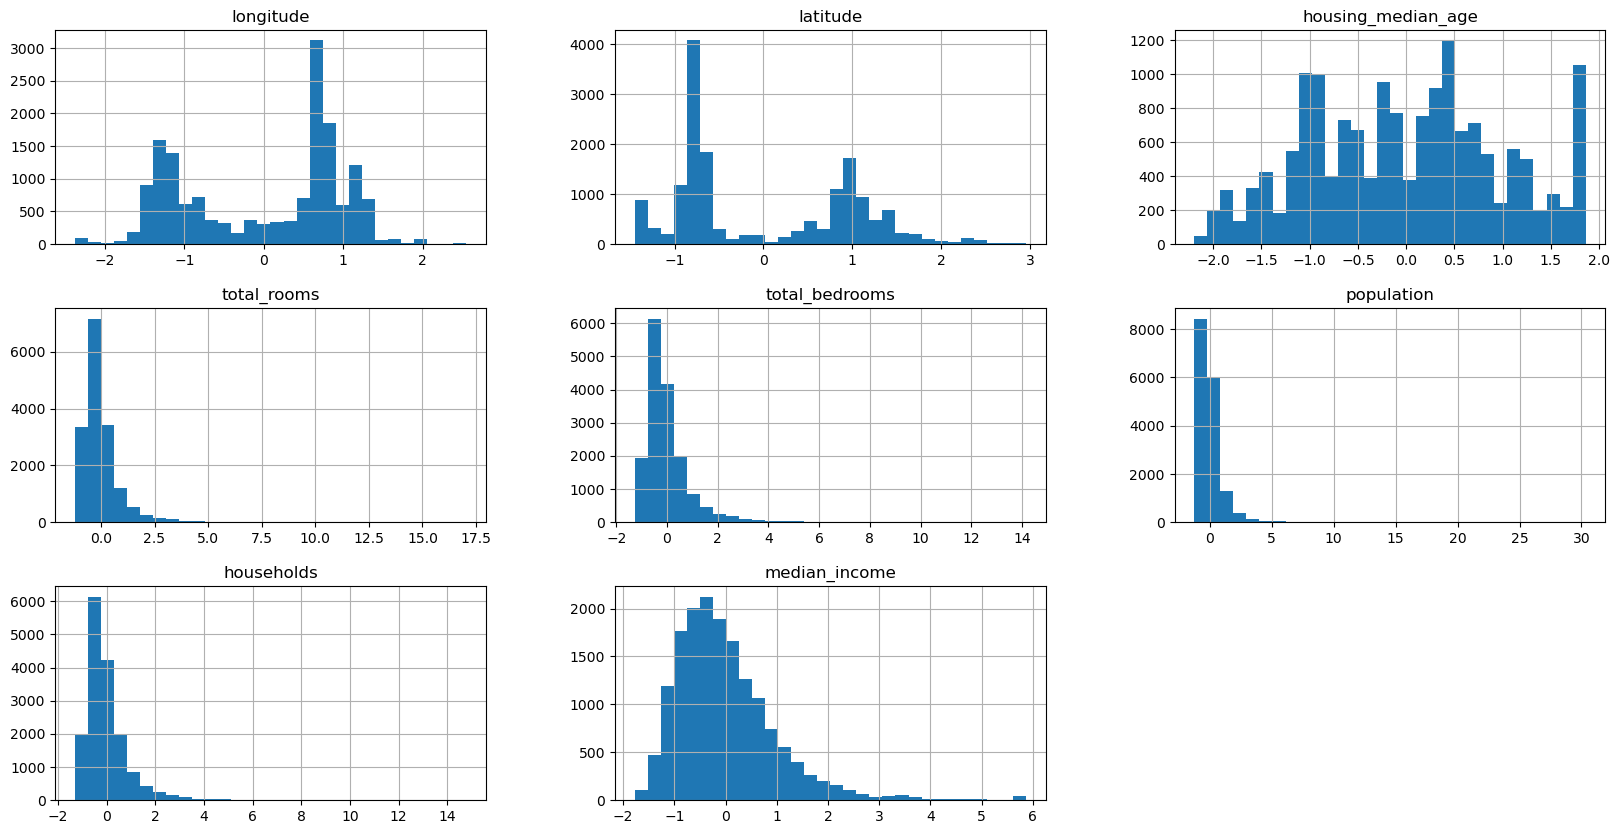

In [1849]:
X_train[numericas].hist(bins = 30,figsize = (20,10))
plt.show()

### <font color= ##28af2e>Correlación de datos</font>

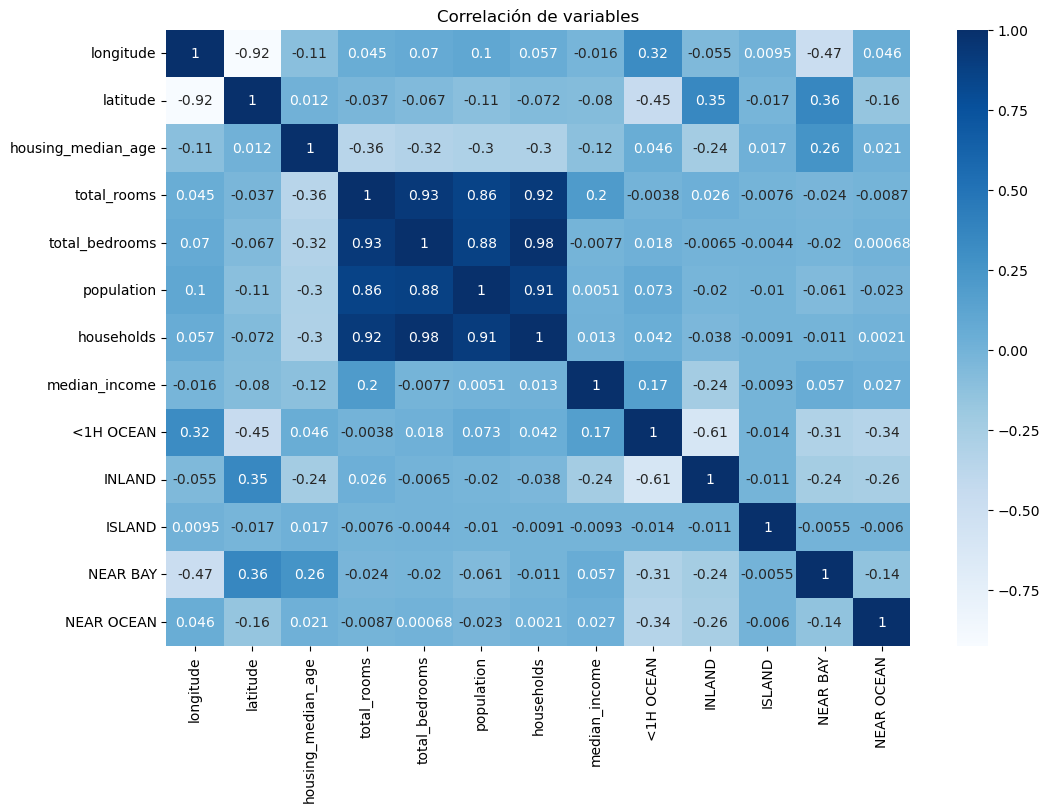

In [1846]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot = True, cmap='Blues')
plt.title('Correlación de variables')
plt.show()

In [1847]:
def calcDrop(res):

    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    

    poss_drop = list(set(res['drop'].tolist()))


    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop


def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    

    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X_train)
print(drop)

['households', 'latitude', 'total_rooms', 'population', '<1H OCEAN']


/var/folders/j7/4bqnb11950x1pthz9_3ckclm0000gn/T/ipykernel_71133/1208988273.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
/var/folders/j7/4bqnb11950x1pthz9_3ckclm0000gn/T/ipykernel_71133/1208988273.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


Eliminamos las variables más correlacionads entre si.

In [1852]:
X_train_scaled = X_train.drop(columns = ['households', 'total_rooms', 'population', 'latitude', '<1H OCEAN'], axis=1)
X_test_scaled = X_test.drop(columns = ['households', 'total_rooms', 'population', 'latitude', '<1H OCEAN'], axis=1)
X_train_scaled.head()

,longitude,housing_median_age,total_bedrooms,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-1.106514,-1.162062,0.929297,0.438412,0,0,0,0
2057,-0.024671,0.348657,-0.850523,-0.242389,1,0,0,0
6453,0.758045,-0.287435,0.747242,-0.108969,1,0,0,0
4619,0.633408,-0.048901,0.989183,-0.861168,0,0,0,0
15266,1.151895,-0.128412,-0.345083,-0.168986,0,0,0,1


### <font color= ##28af2e>Relación entre variables</font> 

In [1857]:
!pip install scipy

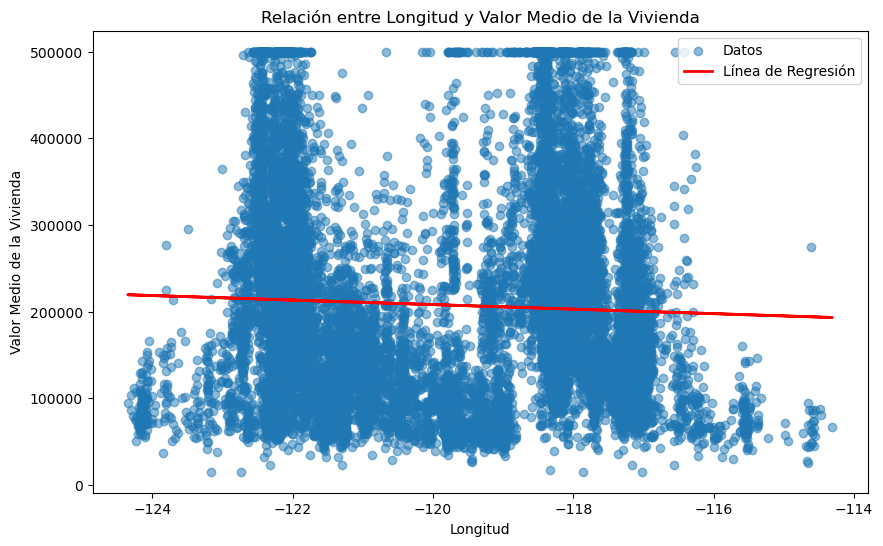

In [1859]:
longitude = df['longitude']  
median_house_value = df['median_house_value'] 

pendiente, intercepto, r, p, std_err = stats.linregress(longitude, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, longitude))

plt.figure(figsize=(10, 6))
plt.scatter(longitude, median_house_value, label='Datos', alpha=0.5)
plt.plot(longitude, mymodel, 'r', label = 'Línea de Regresión', linewidth=2)
plt.title('Relación entre Longitud y Valor Medio de la Vivienda')
plt.xlabel('Longitud')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()

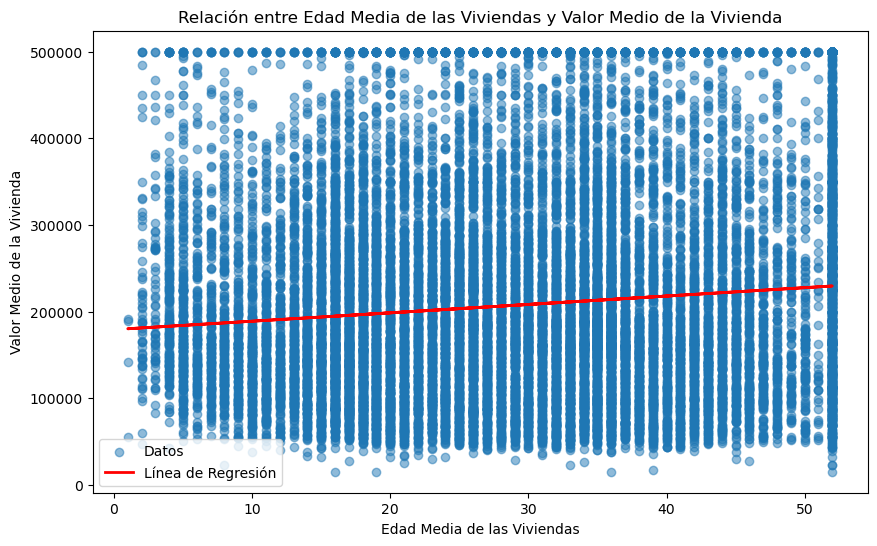

In [1865]:
housing_median_age = df['housing_median_age']  

pendiente, intercepto, r, p, std_err = stats.linregress(housing_median_age, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, housing_median_age))

plt.figure(figsize=(10, 6))
plt.scatter(housing_median_age, median_house_value, label='Datos', alpha=0.5)
plt.plot(housing_median_age, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Edad Media de las Viviendas y Valor Medio de la Vivienda')
plt.xlabel('Edad Media de las Viviendas')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()

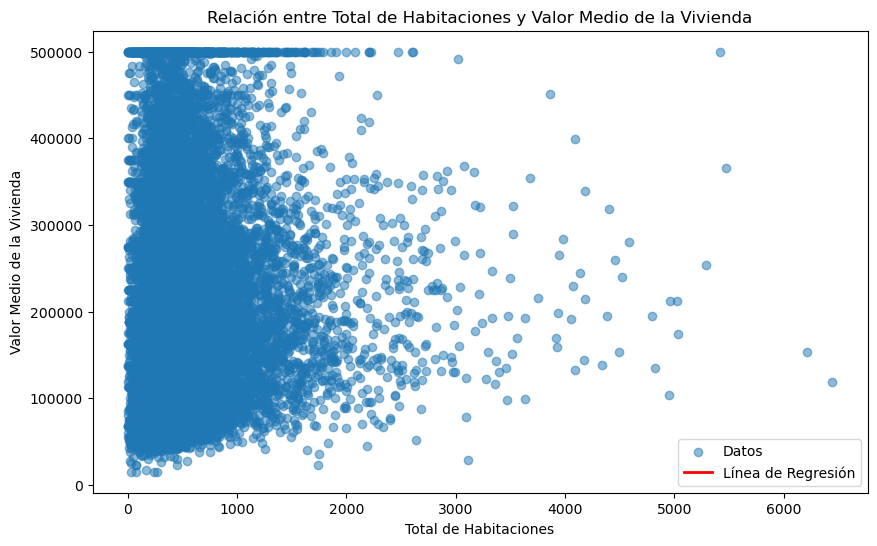

In [1866]:
total_bedrooms = df['total_bedrooms']  

pendiente, intercepto, r, p, std_err = stats.linregress(total_bedrooms, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, total_bedrooms))

plt.figure(figsize=(10, 6))
plt.scatter(total_bedrooms, median_house_value, label='Datos', alpha=0.5)
plt.plot(total_bedrooms, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Total de Habitaciones y Valor Medio de la Vivienda')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


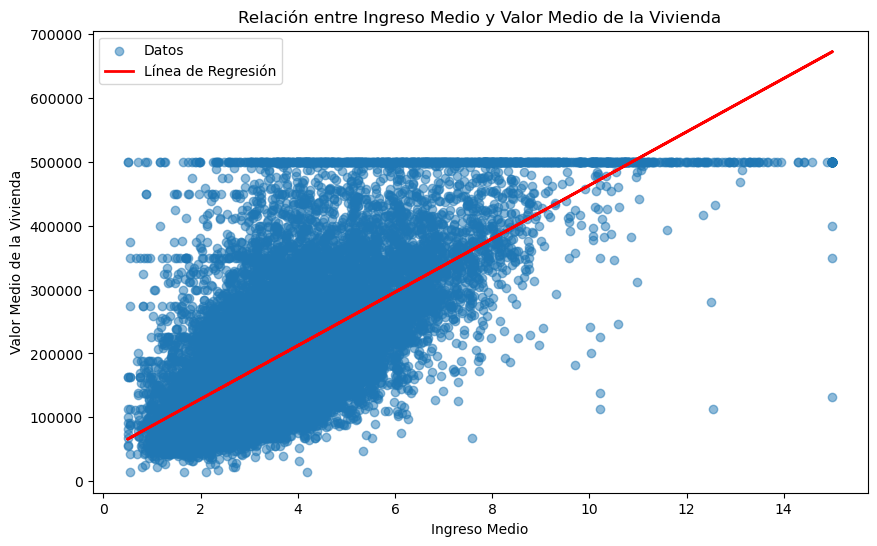

In [1867]:
median_income = df['median_income']

pendiente, intercepto, r, p, std_err = stats.linregress(median_income, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, median_income))

plt.figure(figsize=(10, 6))
plt.scatter(median_income, median_house_value, label='Datos', alpha=0.5)
plt.plot(median_income, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Ingreso Medio y Valor Medio de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


Podemos observar que las variables no tiene gran línea de regresión más que la última, donde se puede observar que entre más ingreso medio, aumenta el valor medio de la vivienda.

### <font color= ##28af2e>Conclusiones</font> 



<p style="text-align: justify;">

El conjunto de datos contiene varios valores atípicos, especialmente en la variable objetivo median_house_value. Esto refleja la realidad del mercado inmobiliario en California, donde los precios varían drásticamente según la ubicación.

Aunque algunas variables como median_income muestran una relación lineal clara con el valor de las viviendas, otras características como el número de habitaciones (total_rooms) o la edad de las viviendas (housing_median_age) no tienen correlaciones fuertes con el precio.

Muchas de las distribuciones de las variables numéricas, como median_income, se aproximan a una distribución normal. Sin embargo, los valores atípicos en varias de estas columnas desvían la media y pueden afectar los resultados de los modelos si no se tratan adecuadamente.

El dataset es relativamente grande, lo que es útil para entrenar modelos de predicción grandes. Sin embargo, también implica un mayor esfuerzo de limpieza y preprocesamiento para asegurar que los valores atípicos y los datos faltantes no hagan sesgos.

La variable categórica ocean_proximity sugiere que la cercanía al océano es un factor relevante. Áreas cerca del mar suelen tener precios más altos.
</p>
